In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/Iris.csv')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [8]:
df = df.drop_duplicates()

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encode the target variable
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

In [12]:
# Verify encoding
print("\nSpecies encoding mapping:")
for i, species in enumerate(le.classes_):
    print(f"{species}: {i}")


Species encoding mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


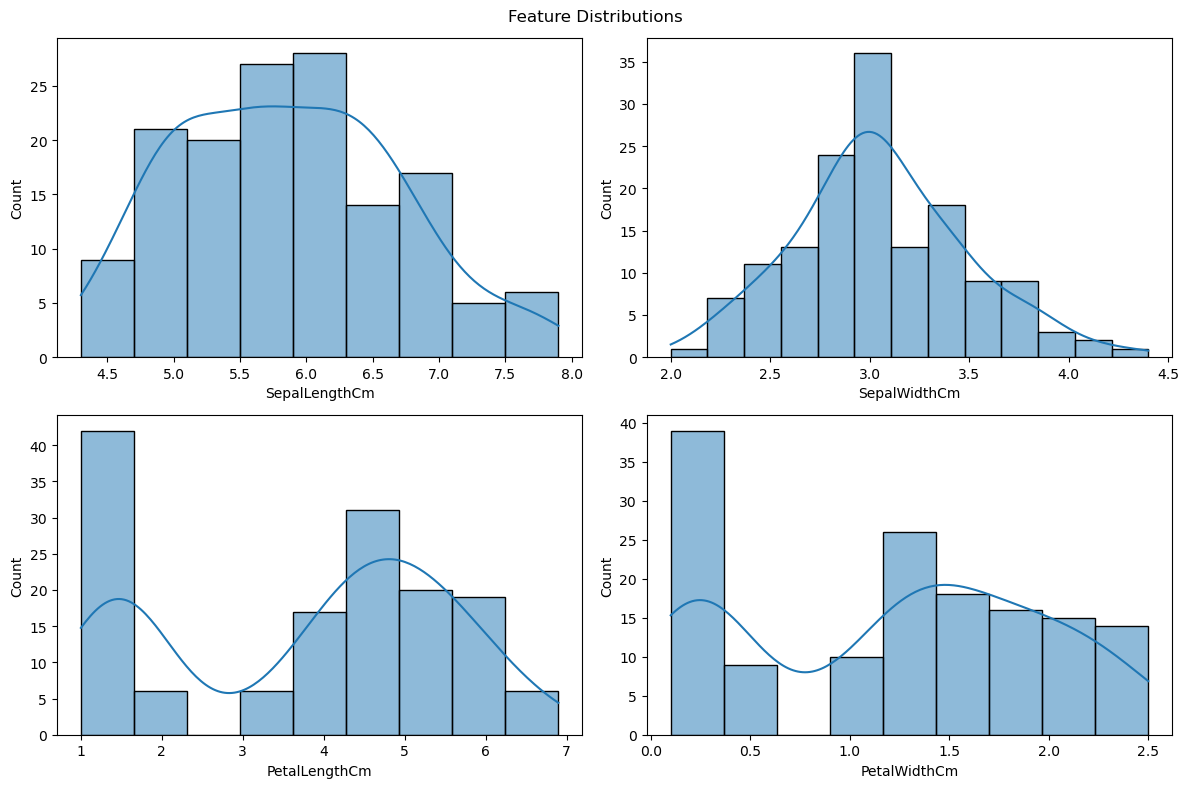

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=df, x='SepalLengthCm', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='SepalWidthCm', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='PetalLengthCm', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='PetalWidthCm', kde=True, ax=axes[1,1])
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

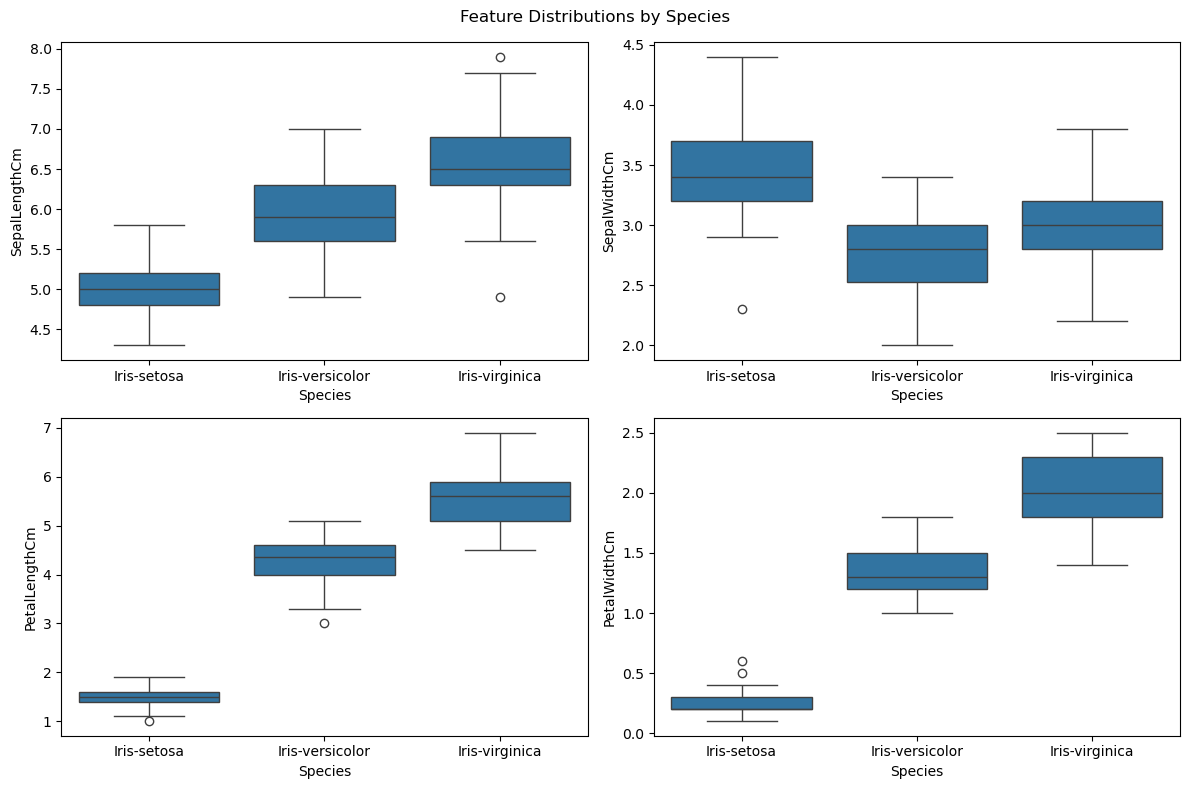

In [16]:
# Boxplots for each feature by species
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.suptitle('Feature Distributions by Species')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                           roc_auc_score, roc_curve, auc)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Split into features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species_encoded']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

KNN: Mean Accuracy = 0.949 (±0.050)
SVM: Mean Accuracy = 0.957 (±0.028)
Decision Tree: Mean Accuracy = 0.949 (±0.043)
Random Forest: Mean Accuracy = 0.940 (±0.044)


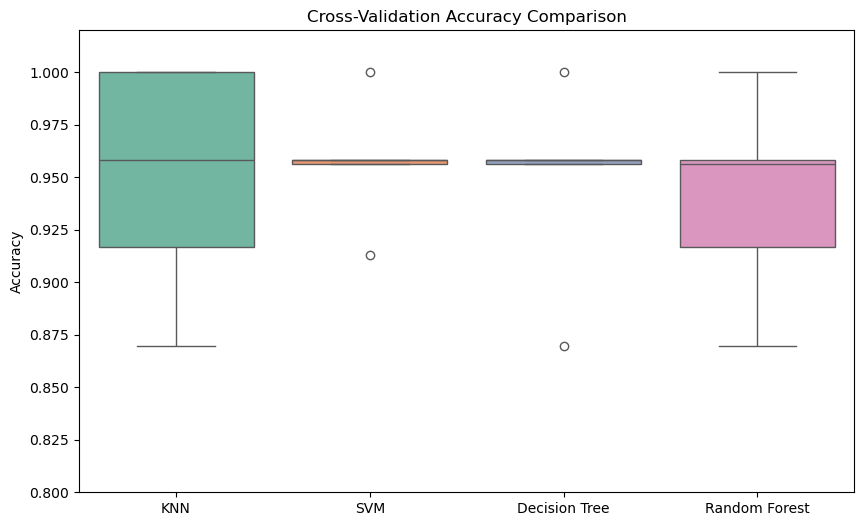

In [22]:
# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# Plot CV results
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(results), palette='Set2')
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.02)
plt.show()

In [23]:
# SVM Hyperparameter Tuning
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), 
                       svm_params, cv=5, 
                       scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                      rf_params, cv=5,
                      scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM Score:", svm_grid.best_score_)
print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Score:", rf_grid.best_score_)

Best SVM Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best SVM Score: 0.9742753623188406

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Score: 0.9485507246376812


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train models
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_

models = {
    'SVM (Tuned)': best_svm,
    'Random Forest (Tuned)': best_rf
}

# Evaluate on test set
final_results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)
    
    # Multi-class ROC AUC (one-vs-rest)
    roc_auc = roc_auc_score(pd.get_dummies(y_test), y_proba, multi_class='ovr')
    
    final_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc
    })

# Display results
results_df = pd.DataFrame(final_results).set_index('Model')
display(results_df)

# Classification reports
for name, model in models.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, model.predict(X_test_scaled), 
                               target_names=le.classes_))

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
SVM (Tuned),0.933333,0.933333,0.933333,0.933333,0.990000
Random Forest (Tuned),0.966667,0.969697,0.966667,0.966583,0.988333



SVM (Tuned) Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30


Random Forest (Tuned) Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

